[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5
 5 5 5 5 5 5 5 5 5 5 5 5 

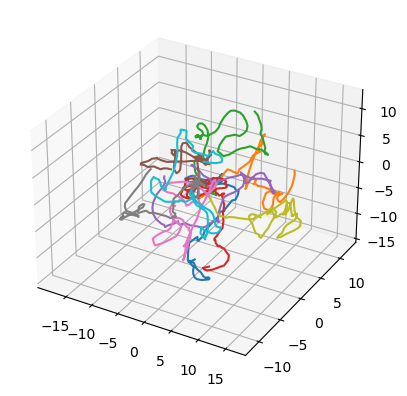

In [ ]:
# %%

import numpy as np
import matplotlib.pyplot as plt
import importlib
import filamentFields
importlib.reload(filamentFields)

filaments = []
for i in range(10):
    x = np.cumsum(np.random.randn(100))
    y = np.cumsum(np.random.randn(100))
    z = np.cumsum(np.random.randn(100))
    x = np.convolve(x, np.ones(5)/5, mode='valid')
    y = np.convolve(y, np.ones(5)/5, mode='valid')
    z = np.convolve(z, np.ones(5)/5, mode='valid')        
    filaments.append(np.vstack([x,y,z]).T)
    
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
for r in filaments:
    ax.plot(r[:,0],r[:,1],r[:,2])



fF = filamentFields.filamentFields(filaments)
all_nodes = fF.return_all_nodes()

node_labels = fF.return_node_labels()
print(node_labels)

edge_labels = fF.return_edge_labels()
print(edge_labels)

In [ ]:
# %%

fF.analyzeLocalVolume(np.array([0,0,0]), 2,0.01)

The number of edges sampled is: 46
The volume fraction is: 0.000382505
The orientational order parameter is: 0.157444
The entanglement is: 4.1285


In [ ]:
def linspace3(start, stop, num):
    return np.vstack([np.linspace(start[i], stop[i], num) for i in range(3)]).T 

single_edge = linspace3([0,0,0],[1,1,1],10)

In [ ]:
single_edge

array([[0.        , 0.        , 0.        ],
       [0.11111111, 0.11111111, 0.11111111],
       [0.22222222, 0.22222222, 0.22222222],
       [0.33333333, 0.33333333, 0.33333333],
       [0.44444444, 0.44444444, 0.44444444],
       [0.55555556, 0.55555556, 0.55555556],
       [0.66666667, 0.66666667, 0.66666667],
       [0.77777778, 0.77777778, 0.77777778],
       [0.88888889, 0.88888889, 0.88888889],
       [1.        , 1.        , 1.        ]])

In [ ]:
# %%

def linspace3(start, stop, num):
    return np.vstack([np.linspace(start[i], stop[i], num) for i in range(3)]).T 

single_edge = linspace3([0,0,0],[1,1,1],10)

mg = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
aligned_filaments = []
for i in range(100):
    aligned_filaments.append(single_edge + mg[0][i%10] + mg[1][i//10])

ValueError: operands could not be broadcast together with shapes (10,3) (10,) 

In [ ]:
# %%

def linspace3(start, stop, num):
    return np.vstack([np.linspace(start[i], stop[i], num) for i in range(3)]).T 

single_edge = linspace3([0,0,0],[1,1,1],10)

mg = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
aligned_filaments = []
for i in range(100):
    translator = np.array([mg[0][i%10], mg[1][i//10],0])
    aligned_filaments.append(single_edge + translator)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [ ]:
translator

NameError: name 'translator' is not defined

In [ ]:
translator

NameError: name 'translator' is not defined

In [ ]:
[mg[0][i%10], mg[1][i//10],0]

[array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 0]

In [ ]:
# %%

def linspace3(start, stop, num):
    return np.vstack([np.linspace(start[i], stop[i], num) for i in range(3)]).T 

single_edge = linspace3([0,0,0],[1,1,1],10)

mg = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
aligned_filaments = []
for i in range(100):
    translator = np.array([mg[0][i],mg[1][i],0])
    aligned_filaments.append(single_edge + translator)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [ ]:
mg

[array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.1111

In [ ]:
mg[0]

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.2222222

In [ ]:
mg[0][i]

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [ ]:
i

0

In [ ]:
mg[0]

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.2222222

In [ ]:
mg = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))

In [ ]:
mg

[array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
         0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
        [0.        , 0.1111

In [ ]:
# %%

def linspace3(start, stop, num):
    return np.vstack([np.linspace(start[i], stop[i], num) for i in range(3)]).T 

single_edge = linspace3([0,0,0],[1,1,1],10)

mg = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
aligned_filaments = []
for i in range(100):
    translator = np.array([mg[0][i],mg[1][i],0]).T
    aligned_filaments.append(single_edge + translator)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [ ]:
# %%

def linspace3(start, stop, num):
    return np.vstack([np.linspace(start[i], stop[i], num) for i in range(3)]).T 

single_edge = linspace3([0,0,0],[1,1,1],10)

mg = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
aligned_filaments = []
for i in range(100):
    translator = np.array([mg[0][i],mg[1][i],0]).T
    aligned_filaments.append(single_edge + translator)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [ ]:
# %%

def linspace3(start, stop, num):
    return np.vstack([np.linspace(start[i], stop[i], num) for i in range(3)]).T 

single_edge = linspace3([0,0,0],[1,1,1],10)

mg = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
mg = [mg[0].flatten(),mg[1].flatten()]
aligned_filaments = []
for i in range(100):
    translator = np.array([mg[0][i],mg[1][i],0]).T
    aligned_filaments.append(single_edge + translator)

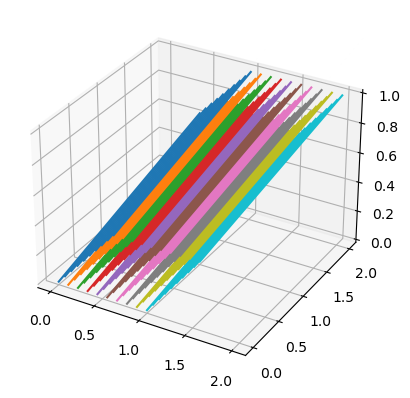

In [ ]:
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
for i in range(100):
    ax.plot(aligned_filaments[i][:,0],aligned_filaments[i][:,1],aligned_filaments[i][:,2])

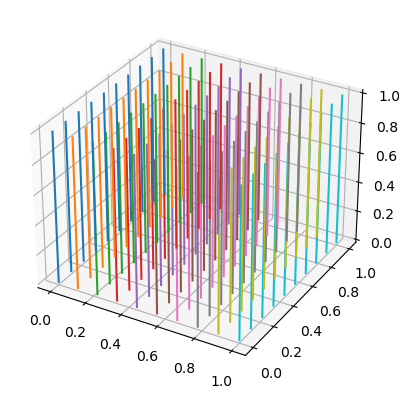

In [ ]:
# %%

def linspace3(start, stop, num):
    return np.vstack([np.linspace(start[i], stop[i], num) for i in range(3)]).T 

single_edge = linspace3([0,0,0],[0,0,1],10)

mg = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
mg = [mg[0].flatten(),mg[1].flatten()]
aligned_filaments = []
for i in range(100):
    translator = np.array([mg[0][i],mg[1][i],0]).T
    aligned_filaments.append(single_edge + translator)
    
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
for i in range(100):
    ax.plot(aligned_filaments[i][:,0],aligned_filaments[i][:,1],aligned_filaments[i][:,2])

In [ ]:
# %%

fF = filamentFields.filamentFields(aligned_filaments)

In [ ]:
# %%

fF.analyzeLocalVolume(np.array([0,0,0]), 2,0.01)

The number of edges sampled is: 900
The volume fraction is: 0.0009375
The orientational order parameter is: 1
The entanglement is: 0
